# Computer vision 
## A Gentle Introduction to Object Recognition With Deep Learning

Computer vision is an interdisciplinary field that has been gaining huge amounts of traction in the recent years(since CNN) and self-driving cars have taken centre stage. Another integral part of computer vision is object detection. Object detection aids in pose estimation, vehicle detection, surveillance etc. The difference between object detection algorithms and classification algorithms is that in detection algorithms, we try to draw a bounding box around the object of interest to locate it within the image. Also, you might not necessarily draw just one bounding box in an object detection case, there could be many bounding boxes representing different objects of interest within the image and you would not know how many beforehand.

The major reason why you cannot proceed with this problem by building a standard convolutional network followed by a fully connected layer is that, the length of the output layer is variable — not constant, this is because the number of occurrences of the objects of interest is not fixed. A naive approach to solve this problem would be to take different regions of interest from the image, and use a CNN to classify the presence of the object within that region. The problem with this approach is that the objects of interest might have different spatial locations within the image and different aspect ratios. Hence, you would have to select a huge number of regions and this could computationally blow up. Therefore, algorithms like R-CNN, YOLO etc have been developed to find these occurrences and find them fast.


+ Object recognition is refers to a collection of related tasks for identifying objects in digital photographs.
+ Region-Based Convolutional Neural Networks, or R-CNNs, are a family of techniques for addressing object localization and recognition tasks, designed for model performance.
+ You Only Look Once, or YOLO, is a second family of techniques for object recognition designed for speed and real-time use.


References: 

https://machinelearningmastery.com/object-recognition-with-deep-learning/
https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e

## Computer Vision Tasks


    Image Classification: Predict the type or class of an object in an image.
        Input: An image with a single object, such as a photograph.
        Output: A class label (e.g. one or more integers that are mapped to class labels).
    Object Localization: Locate the presence of objects in an image and indicate their location with a bounding box.
        Input: An image with one or more objects, such as a photograph.
        Output: One or more bounding boxes (e.g. defined by a point, width, and height).
    Object Detection: Locate the presence of objects with a bounding box and types or classes of the located objects in an image.
        Input: An image with one or more objects, such as a photograph.
        Output: One or more bounding boxes (e.g. defined by a point, width, and height), and a class label for each bounding box.


## R-CNN
### “Regions with CNN Features” or “Region-Based Convolutional Neural Network,” developed by Ross Girshick, et al.

To bypass the problem of selecting a huge number of regions, Ross Girshick et al. proposed a method where we use selective search to extract just 2000 regions from the image and he called them region proposals. Therefore, now, instead of trying to classify a huge number of regions, you can just work with 2000 regions. These 2000 region proposals are generated using the selective search algorithm.


+ Module 1: Region Proposal. Generate and extract category independent region proposals, e.g. candidate bounding boxes.
+ Module 2: Feature Extractor. Extract feature from each candidate region, e.g. using a deep convolutional neural network.
+ Module 3: Classifier. Classify features as one of the known class, e.g. linear SVM classifier model.


![title](img/rcnn_001.png)

These 2000 candidate region proposals are warped into a square and fed into a convolutional neural network that produces a 4096-dimensional feature vector as output. The CNN acts as a feature extractor and the output dense layer consists of the features extracted from the image and the extracted features are fed into an SVM to classify the presence of the object within that candidate region proposal. In addition to predicting the presence of an object within the region proposals, the algorithm also predicts four values which are offset values to increase the precision of the bounding box. For example, given a region proposal, the algorithm would have predicted the presence of a person but the face of that person within that region proposal could’ve been cut in half. Therefore, the offset values help in adjusting the bounding box of the region proposal.

![title](img/rcnn_002.png)

### Problems with R-CNN

+ It still takes a huge amount of time to train the network as you would have to classify 2000 region proposals per image.
+ It cannot be implemented real time as it takes around 47 seconds for each test image
+ The selective search algorithm is a fixed algorithm. Therefore, no learning is happening at that stage. This could lead to the generation of bad candidate region proposals.

# Fast R-CNN

The same author of the previous paper(R-CNN) solved some of the drawbacks of R-CNN to build a faster object detection algorithm and it was called Fast R-CNN. The approach is similar to the R-CNN algorithm. But, instead of feeding the region proposals to the CNN, we feed the input image to the CNN to generate a convolutional feature map. From the convolutional feature map, we identify the region of proposals and warp them into squares and by using a RoI pooling layer we reshape them into a fixed size so that it can be fed into a fully connected layer. From the RoI feature vector, we use a softmax layer to predict the class of the proposed region and also the offset values for the bounding box.

The reason “Fast R-CNN” is faster than R-CNN is because you don’t have to feed 2000 region proposals to the convolutional neural network every time. Instead, the convolution operation is done only once per image and a feature map is generated from it.

![title](img/rcnn_fasterrcnn_times.png)

Fast R-CNN is proposed as a single model instead of a pipeline to learn and output regions and classifications directly.

The architecture of the model takes the photograph a set of region proposals as input that are passed through a deep convolutional neural network. A pre-trained CNN, such as a VGG-16, is used for feature extraction. The end of the deep CNN is a custom layer called a Region of Interest Pooling Layer, or RoI Pooling, that extracts features specific for a given input candidate region.

The output of the CNN is then interpreted by a fully connected layer then the model bifurcates into two outputs, one for the class prediction via a softmax layer, and another with a linear output for the bounding box. This process is then repeated multiple times for each region of interest in a given image.

# Faster R-CNN

The model architecture was further improved for both speed of training and detection by Shaoqing Ren, et al. at Microsoft Research in the 2016 paper titled “Faster R-CNN: Towards Real-Time Object Detection with Region Proposal Networks.”

The architecture was the basis for the first-place results achieved on both the ILSVRC-2015 and MS COCO-2015 object recognition and detection competition tasks.

The architecture was designed to both propose and refine region proposals as part of the training process, referred to as a Region Proposal Network, or RPN. These regions are then used in concert with a Fast R-CNN model in a single model design. These improvements both reduce the number of region proposals and accelerate the test-time operation of the model to near real-time with then state-of-the-art performance.

Although it is a single unified model, the architecture is comprised of two modules:

+ Module 1: Region Proposal Network. Convolutional neural network for proposing regions and the type of object to consider in the region.
+ Module 2: Fast R-CNN. Convolutional neural network for extracting features from the proposed regions and outputting the bounding box and class labels.

Both modules operate on the same output of a deep CNN. The region proposal network acts as an attention mechanism for the Fast R-CNN network, informing the second network of where to look or pay attention.

The architecture of the model is summarized:

![title](img/fasterrcnn_001.png)

The RPN works by taking the output of a pre-trained deep CNN, such as VGG-16, and passing a small network over the feature map and outputting multiple region proposals and a class prediction for each. Region proposals are bounding boxes, based on so-called anchor boxes or pre-defined shapes designed to accelerate and improve the proposal of regions. The class prediction is binary, indicating the presence of an object, or not, so-called “objectness” of the proposed region.

A procedure of alternating training is used where both sub-networks are trained at the same time, although interleaved. This allows the parameters in the feature detector deep CNN to be tailored or fine-tuned for both tasks at the same time.

# YOLO — You Only Look Once

All of the previous object detection algorithms use regions to localize the object within the image. The network does not look at the complete image. Instead, parts of the image which have high probabilities of containing the object. YOLO or You Only Look Once is an object detection algorithm much different from the region based algorithms seen above. In YOLO a single convolutional network predicts the bounding boxes and the class probabilities for these boxes.

![title](img/yolo_001.png)

How YOLO works is that we take an image and split it into an SxS grid, within each of the grid we take m bounding boxes. For each of the bounding box, the network outputs a class probability and offset values for the bounding box. The bounding boxes having the class probability above a threshold value is selected and used to locate the object within the image.

YOLO is orders of magnitude faster(45 frames per second) than other object detection algorithms. The limitation of YOLO algorithm is that it struggles with small objects within the image, for example it might have difficulties in detecting a flock of birds. This is due to the spatial constraints of the algorithm.

# YOLOv2 (YOLO9000) and YOLOv3

The model was updated by Joseph Redmon and Ali Farhadi in an effort to further improve model performance in their 2016 paper titled “YOLO9000: Better, Faster, Stronger.”

Although this variation of the model is referred to as YOLO v2, an instance of the model is described that was trained on two object recognition datasets in parallel, capable of predicting 9,000 object classes, hence given the name “YOLO9000.”

A number of training and architectural changes were made to the model, such as the use of batch normalization and high-resolution input images.

Like Faster R-CNN, YOLOv2 model makes use of anchor boxes, pre-defined bounding boxes with useful shapes and sizes that are tailored during training. The choice of bounding boxes for the image is pre-processed using a k-means analysis on the training dataset.

Importantly, the predicted representation of the bounding boxes is changed to allow small changes to have a less dramatic effect on the predictions, resulting in a more stable model. Rather than predicting position and size directly, offsets are predicted for moving and reshaping the pre-defined anchor boxes relative to a grid cell and dampened by a logistic function.

Reference: https://pjreddie.com/darknet/yolo/

![title](img/yolo_002.png)

# Now to code a solution

## Create and Save Model

The first step is to download the pre-trained model weights.

These were trained using the DarkNet code base on the MSCOCO dataset. Download the model weights and place them into your current working directory with the filename “yolov3.weights.” It is a large file and may take a moment to download depending on the speed of your internet connection.

https://pjreddie.com/media/files/yolov3.weights

References: 

+ https://github.com/experiencor/keras-yolo3
+ https://pjreddie.com/darknet/yolo/

Next, we need to define a Keras model that has the right number and type of layers to match the downloaded model weights. The model architecture is called a “DarkNet” and was originally loosely based on the VGG-16 model.

## Functions / Classes from "yolo3_one_file_to_detect_them_all.py"

In [1]:
# create a YOLOv3 Keras model and save it to file
# based on https://github.com/experiencor/keras-yolo3
import struct
import numpy as np
from numpy import expand_dims
from matplotlib import pyplot
from matplotlib.patches import Rectangle
import argparse
import os

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import UpSampling2D
#from tensorflow.keras.layers.merge import add, concatenate
from tensorflow.keras.layers import add, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

2022-12-16 21:44:59.026040: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def _conv_block(inp, convs, skip=True):
	x = inp
	count = 0
	for conv in convs:
		if count == (len(convs) - 2) and skip:
			skip_connection = x
		count += 1
		if conv['stride'] > 1: x = ZeroPadding2D(((1,0),(1,0)))(x) # peculiar padding as darknet prefer left and top
		x = Conv2D(conv['filter'],
				   conv['kernel'],
				   strides=conv['stride'],
				   padding='valid' if conv['stride'] > 1 else 'same', # peculiar padding as darknet prefer left and top
				   name='conv_' + str(conv['layer_idx']),
				   use_bias=False if conv['bnorm'] else True)(x)
		if conv['bnorm']: x = BatchNormalization(epsilon=0.001, name='bnorm_' + str(conv['layer_idx']))(x)
		if conv['leaky']: x = LeakyReLU(alpha=0.1, name='leaky_' + str(conv['layer_idx']))(x)
	return add([skip_connection, x]) if skip else x
 

In [3]:
class WeightReader:
    def __init__(self, weight_file):
        with open(weight_file, 'rb') as w_f:
            major,    = struct.unpack('i', w_f.read(4))
            minor,    = struct.unpack('i', w_f.read(4))
            revision, = struct.unpack('i', w_f.read(4))

            if (major*10 + minor) >= 2 and major < 1000 and minor < 1000:
                w_f.read(8)
            else:
                w_f.read(4)

            transpose = (major > 1000) or (minor > 1000)
            
            binary = w_f.read()

        self.offset = 0
        self.all_weights = np.frombuffer(binary, dtype='float32')
        
    def read_bytes(self, size):
        self.offset = self.offset + size
        return self.all_weights[self.offset-size:self.offset]

    def load_weights(self, model):
        for i in range(106):
            try:
                conv_layer = model.get_layer('conv_' + str(i))
                print("loading weights of convolution #" + str(i))

                if i not in [81, 93, 105]:
                    norm_layer = model.get_layer('bnorm_' + str(i))

                    size = np.prod(norm_layer.get_weights()[0].shape)

                    beta  = self.read_bytes(size) # bias
                    gamma = self.read_bytes(size) # scale
                    mean  = self.read_bytes(size) # mean
                    var   = self.read_bytes(size) # variance            

                    weights = norm_layer.set_weights([gamma, beta, mean, var])  

                if len(conv_layer.get_weights()) > 1:
                    bias   = self.read_bytes(np.prod(conv_layer.get_weights()[1].shape))
                    kernel = self.read_bytes(np.prod(conv_layer.get_weights()[0].shape))
                    
                    kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
                    kernel = kernel.transpose([2,3,1,0])
                    conv_layer.set_weights([kernel, bias])
                else:
                    kernel = self.read_bytes(np.prod(conv_layer.get_weights()[0].shape))
                    kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
                    kernel = kernel.transpose([2,3,1,0])
                    conv_layer.set_weights([kernel])
            except ValueError:
                print("no convolution #" + str(i))     
    
    def reset(self):
        self.offset = 0

In [4]:
def make_yolov3_model():
    input_image = Input(shape=(None, None, 3))

    # Layer  0 => 4
    x = _conv_block(input_image, [{'filter': 32, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 0},
                                  {'filter': 64, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 1},
                                  {'filter': 32, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 2},
                                  {'filter': 64, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 3}])

    # Layer  5 => 8
    x = _conv_block(x, [{'filter': 128, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 5},
                        {'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 6},
                        {'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 7}])

    # Layer  9 => 11
    x = _conv_block(x, [{'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 9},
                        {'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 10}])

    # Layer 12 => 15
    x = _conv_block(x, [{'filter': 256, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 12},
                        {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 13},
                        {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 14}])

    # Layer 16 => 36
    for i in range(7):
        x = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 16+i*3},
                            {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 17+i*3}])
        
    skip_36 = x
        
    # Layer 37 => 40
    x = _conv_block(x, [{'filter': 512, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 37},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 38},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 39}])

    # Layer 41 => 61
    for i in range(7):
        x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 41+i*3},
                            {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 42+i*3}])
        
    skip_61 = x
        
    # Layer 62 => 65
    x = _conv_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 62},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 63},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 64}])

    # Layer 66 => 74
    for i in range(3):
        x = _conv_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 66+i*3},
                            {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 67+i*3}])
        
    # Layer 75 => 79
    x = _conv_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 75},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 76},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 77},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 78},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 79}], skip=False)

    # Layer 80 => 82
    yolo_82 = _conv_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 80},
                              {'filter':  255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 81}], skip=False)

    # Layer 83 => 86
    x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 84}], skip=False)
    x = UpSampling2D(2)(x)
    x = concatenate([x, skip_61])

    # Layer 87 => 91
    x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 87},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 88},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 89},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 90},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 91}], skip=False)

    # Layer 92 => 94
    yolo_94 = _conv_block(x, [{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 92},
                              {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 93}], skip=False)

    # Layer 95 => 98
    x = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True,   'layer_idx': 96}], skip=False)
    x = UpSampling2D(2)(x)
    x = concatenate([x, skip_36])

    # Layer 99 => 106
    yolo_106 = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 99},
                               {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 100},
                               {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 101},
                               {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 102},
                               {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 103},
                               {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 104},
                               {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 105}], skip=False)

    model = Model(input_image, [yolo_82, yolo_94, yolo_106])    
    return model


# Download the weights locally

`wget https://pjreddie.com/media/files/yolov3.weights`

## Model Build / Implementation

In [5]:
# define the model
model = make_yolov3_model()

# load the model weights
weight_reader = WeightReader('yolov3.weights')

# set the model weights into the model
weight_reader.load_weights(model)

# That’s it; we now have a YOLOv3 model for use.
# We can save this model to a Keras compatible .h5 model file ready for later use.
# save the model to file
model.save('ML-008_YOLO_model.h5')


2022-12-16 21:45:05.502052: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib:/usr/lib64::
2022-12-16 21:45:05.502084: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-16 21:45:05.502102: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (codespaces-0b1d0e): /proc/driver/nvidia/version does not exist
2022-12-16 21:45:05.502262: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-16 21:45:05.508064: I tensorflo

loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

## Prediction

"Compile" means "prepare for training", which includes mainly setting up the optimizer. It could also have been saved before, and then you can continue the "same" training after loading the saved model.

In this case we're just loading the weights into an existing design and not performing any training.

In [7]:
# load yolov3 model
model = load_model('ML-008_YOLO_model.h5', compile=False)

# load and prepare an image
def load_image_pixels(filename, shape):
    # load the image to get its shape
    image = load_img(filename)
    width, height = image.size
    # load the image with the required size
    image = load_img(filename, target_size=shape)
    # convert to numpy array
    image = img_to_array(image)
    # scale pixel values to [0, 1]
    image = image.astype('float32')
    image /= 255.0
    # add a dimension so that we have one sample
    image = expand_dims(image, 0)
    return image, width, height

# define the expected input shape for the model
input_w, input_h = 416, 416
# define our new photo
photo_filename = '..' + os.sep + 'data' + os.sep + 'zebra.jpg'
# load and prepare image
image, image_w, image_h = load_image_pixels(photo_filename, (input_w, input_h))

# make prediction
yhat = model.predict(image)
# summarize the shape of the list of arrays
print([a.shape for a in yhat])

2022-12-16 21:45:31.008285: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]


## What did I get?

Running the example returns a list of three NumPy arrays, the shape of which is displayed as output.

These arrays predict both the bounding boxes and class labels but are encoded. They must be interpreted.

Make a Prediction and Interpret Result

The output of the model is, in fact, encoded candidate bounding boxes from three different grid sizes, and the boxes are defined the context of anchor boxes, carefully chosen based on an analysis of the size of objects in the MSCOCO dataset.

The script provided by experiencor provides a function called decode_netout() that will take each one of the NumPy arrays, one at a time, and decode the candidate bounding boxes and class predictions. Further, any bounding boxes that don’t confidently describe an object (e.g. all class probabilities are below a threshold) are ignored. We will use a probability of 60% or 0.6. The function returns a list of BoundBox instances that define the corners of each bounding box in the context of the input image shape and class probabilities.

In [8]:
def _sigmoid(x):
	return 1. / (1. + np.exp(-x))

In [9]:
class BoundBox:
	def __init__(self, xmin, ymin, xmax, ymax, objness = None, classes = None):
		self.xmin = xmin
		self.ymin = ymin
		self.xmax = xmax
		self.ymax = ymax
		self.objness = objness
		self.classes = classes
		self.label = -1
		self.score = -1

	def get_label(self):
		if self.label == -1:
			self.label = np.argmax(self.classes)

		return self.label

	def get_score(self):
		if self.score == -1:
			self.score = self.classes[self.get_label()]

		return self.score

In [10]:
def decode_netout(netout, anchors, obj_thresh, net_h, net_w):
	grid_h, grid_w = netout.shape[:2]
	nb_box = 3
	netout = netout.reshape((grid_h, grid_w, nb_box, -1))
	nb_class = netout.shape[-1] - 5
	boxes = []
	netout[..., :2]  = _sigmoid(netout[..., :2])
	netout[..., 4:]  = _sigmoid(netout[..., 4:])
	netout[..., 5:]  = netout[..., 4][..., np.newaxis] * netout[..., 5:]
	netout[..., 5:] *= netout[..., 5:] > obj_thresh

	for i in range(grid_h*grid_w):
		row = i / grid_w
		col = i % grid_w
		for b in range(nb_box):
			# 4th element is objectness score
			objectness = netout[int(row)][int(col)][b][4]
			if(objectness.all() <= obj_thresh): continue
			# first 4 elements are x, y, w, and h
			x, y, w, h = netout[int(row)][int(col)][b][:4]
			x = (col + x) / grid_w # center position, unit: image width
			y = (row + y) / grid_h # center position, unit: image height
			w = anchors[2 * b + 0] * np.exp(w) / net_w # unit: image width
			h = anchors[2 * b + 1] * np.exp(h) / net_h # unit: image height
			# last elements are class probabilities
			classes = netout[int(row)][col][b][5:]
			box = BoundBox(x-w/2, y-h/2, x+w/2, y+h/2, objectness, classes)
			boxes.append(box)
	return boxes

In [11]:
def correct_yolo_boxes(boxes, image_h, image_w, net_h, net_w):
	new_w, new_h = net_w, net_h
	for i in range(len(boxes)):
		x_offset, x_scale = (net_w - new_w)/2./net_w, float(new_w)/net_w
		y_offset, y_scale = (net_h - new_h)/2./net_h, float(new_h)/net_h
		boxes[i].xmin = int((boxes[i].xmin - x_offset) / x_scale * image_w)
		boxes[i].xmax = int((boxes[i].xmax - x_offset) / x_scale * image_w)
		boxes[i].ymin = int((boxes[i].ymin - y_offset) / y_scale * image_h)
		boxes[i].ymax = int((boxes[i].ymax - y_offset) / y_scale * image_h)

def _interval_overlap(interval_a, interval_b):
	x1, x2 = interval_a
	x3, x4 = interval_b
	if x3 < x1:
		if x4 < x1:
			return 0
		else:
			return min(x2,x4) - x1
	else:
		if x2 < x3:
			 return 0
		else:
			return min(x2,x4) - x3

def bbox_iou(box1, box2):
	intersect_w = _interval_overlap([box1.xmin, box1.xmax], [box2.xmin, box2.xmax])
	intersect_h = _interval_overlap([box1.ymin, box1.ymax], [box2.ymin, box2.ymax])
	intersect = intersect_w * intersect_h
	w1, h1 = box1.xmax-box1.xmin, box1.ymax-box1.ymin
	w2, h2 = box2.xmax-box2.xmin, box2.ymax-box2.ymin
	union = w1*h1 + w2*h2 - intersect
	return float(intersect) / union

def do_nms(boxes, nms_thresh):
	if len(boxes) > 0:
		nb_class = len(boxes[0].classes)
	else:
		return
	for c in range(nb_class):
		sorted_indices = np.argsort([-box.classes[c] for box in boxes])
		for i in range(len(sorted_indices)):
			index_i = sorted_indices[i]
			if boxes[index_i].classes[c] == 0: continue
			for j in range(i+1, len(sorted_indices)):
				index_j = sorted_indices[j]
				if bbox_iou(boxes[index_i], boxes[index_j]) >= nms_thresh:
					boxes[index_j].classes[c] = 0


In [12]:
# actual implementation to start prediction
anchors = [[116,90, 156,198, 373,326], [30,61, 62,45, 59,119], [10,13, 16,30, 33,23]]
# define the probability threshold for detected objects
class_threshold = 0.6
boxes = list()
for i in range(len(yhat)):
    # decode the output of the network
    boxes += decode_netout(yhat[i][0], anchors[i], class_threshold, input_h, input_w)

Next, the bounding boxes can be stretched back into the shape of the original image. This is helpful as it means that later we can plot the original image and draw the bounding boxes, hopefully detecting real objects.

The experiencor script provides the correct_yolo_boxes() function to perform this translation of bounding box coordinates, taking the list of bounding boxes, the original shape of our loaded photograph, and the shape of the input to the network as arguments. The coordinates of the bounding boxes are updated directly.

In [13]:
# correct the sizes of the bounding boxes for the shape of the image
correct_yolo_boxes(boxes, image_h, image_w, input_h, input_w)

The model has predicted a lot of candidate bounding boxes, and most of the boxes will be referring to the same objects. The list of bounding boxes can be filtered and those boxes that overlap and refer to the same object can be merged. We can define the amount of overlap as a configuration parameter, in this case, 50% or 0.5. This filtering of bounding box regions is generally referred to as non-maximal suppression and is a required post-processing step.

The experiencor script provides this via the do_nms() function that takes the list of bounding boxes and a threshold parameter. Rather than purging the overlapping boxes, their predicted probability for their overlapping class is cleared. This allows the boxes to remain and be used if they also detect another object type.

In [14]:
# suppress non-maximal boxes
do_nms(boxes, 0.5)

This will leave us with the same number of boxes, but only very few of interest. We can retrieve just those boxes that strongly predict the presence of an object: that is are more than 60% confident. This can be achieved by enumerating over all boxes and checking the class prediction values. We can then look up the corresponding class label for the box and add it to the list. Each box must be considered for each class label, just in case the same box strongly predicts more than one object.

We can develop a get_boxes() function that does this and takes the list of boxes, known labels, and our classification threshold as arguments and returns parallel lists of boxes, labels, and scores.

In [15]:
def get_boxes(boxes, labels, thresh):
	v_boxes, v_labels, v_scores = list(), list(), list()
	# enumerate all boxes
	for box in boxes:
		# enumerate all possible labels
		for i in range(len(labels)):
			# check if the threshold for this label is high enough
			if box.classes[i] > thresh:
				v_boxes.append(box)
				v_labels.append(labels[i])
				v_scores.append(box.classes[i]*100)
				# don't break, many labels may trigger for one box
	return v_boxes, v_labels, v_scores

We can call this function with our list of boxes.

We also need a list of strings containing the class labels known to the model in the correct order used during training, specifically those class labels from the MSCOCO dataset. Thankfully, this is provided in the experiencor script.

In [16]:
# define the labels
labels = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck",
    "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench",
    "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe",
    "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard",
    "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
    "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana",
    "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake",
    "chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse",
    "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator",
    "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]
# get the details of the detected objects
v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)

In [17]:
# draw all results
def draw_boxes(filename, v_boxes, v_labels, v_scores):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for i in range(len(v_boxes)):
		box = v_boxes[i]
		# get coordinates
		y1, x1, y2, x2 = box.ymin, box.xmin, box.ymax, box.xmax
		# calculate width and height of the box
		width, height = x2 - x1, y2 - y1
		# create the shape
		rect = Rectangle((x1, y1), width, height, fill=False, color='white')
		# draw the box
		ax.add_patch(rect)
		# draw text and score in top left corner
		label = "%s (%.3f)" % (v_labels[i], v_scores[i])
		pyplot.text(x1, y1, label, color='white')
	# show the plot
	pyplot.show()

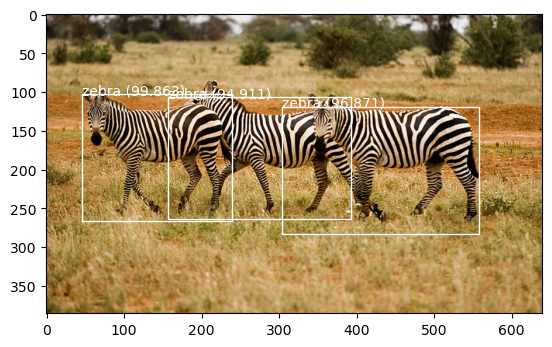

In [18]:
# draw what we found
draw_boxes(photo_filename, v_boxes, v_labels, v_scores)